<a href="https://colab.research.google.com/github/NilavanIniyavan/GlobalAIHubMLCourse/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:
Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=None, n_features=3,random_state=42)
print(X.shape)

(2000, 3)


Question 2:
Explore and analyse raw data.

In [11]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib import pyplot
import numpy as np
df = DataFrame(dict(x=X[:,0], y=X[:,1],z=X[:,2], label=y))
df.head()

,x,y,z,label
0,-8.499150,5.667142,1.509983,2
1,-9.736497,7.584346,1.997468,2
2,0.773310,-7.171882,-6.727008,1
3,1.745282,-5.885697,-7.788316,1
4,1.583768,-5.288722,-7.983133,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   z       2000 non-null   float64
 3   label   2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [12]:
df.describe()

,x,y,z,label
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,-3.185601,3.158252,-0.058714,0.999500
std,4.552214,7.209014,5.037935,0.816599
min,-12.420390,-10.351057,-9.712629,0.000000
25%,-8.239049,-6.206542,-6.163356,0.000000
50%,-2.522167,7.251697,1.965763,1.000000
75%,1.275338,8.652427,4.039708,2.000000
max,4.543077,11.952039,8.012175,2.000000


In [13]:
df.isna().sum()

x        0
y        0
z        0
label    0
dtype: int64

In [14]:
df.groupby(by="label").count()

,x,y,z
label,,,
0,667,667,667
1,667,667,667
2,666,666,666


Question 3:
Do preprocessing for classification.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["label"]) 
df.head()

,x,y,z,label,Label
0,-8.499150,5.667142,1.509983,2,2
1,-9.736497,7.584346,1.997468,2,2
2,0.773310,-7.171882,-6.727008,1,1
3,1.745282,-5.885697,-7.788316,1,1
4,1.583768,-5.288722,-7.983133,1,1


In [16]:
df["Label"].value_counts()

1    667
0    667
2    666
Name: Label, dtype: int64

In [17]:
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

[0, 1, 2]

Question 4:
Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=123)


Question 5:
Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)

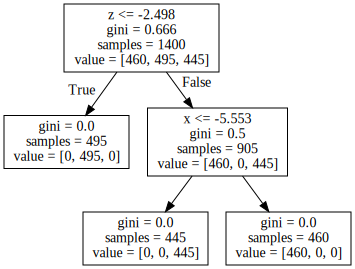

In [39]:
import os
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                    )
graph = graphviz.Source(dot_data)
graph

In [33]:
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)
categories

[0, 1, 2]

In [34]:
preds = model.predict(dmatrix_test)
preds[:10]


array([[0.00185217, 0.0018577 , 0.9962901 ],
       [0.9963032 , 0.00185228, 0.00184451],
       [0.00183537, 0.9963315 , 0.00183314],
       [0.00183537, 0.9963315 , 0.00183314],
       [0.00185217, 0.0018577 , 0.9962901 ],
       [0.00185217, 0.0018577 , 0.9962901 ],
       [0.00185217, 0.0018577 , 0.9962901 ],
       [0.00183537, 0.9963315 , 0.00183314],
       [0.00183537, 0.9963315 , 0.00183314],
       [0.00185217, 0.0018577 , 0.9962901 ]], dtype=float32)

In [35]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2,

Question 6:
Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       221

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [32]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


From the result, we can conclude that the dataset is a pure dataset and so the accuracy of train and test set is 1. So there is undersetting and overfitting problem.